<a href="https://colab.research.google.com/github/Masoud0389/Steady_State/blob/main/knn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#pip install git+https://github.com/Kaggle/learntools.git

In [67]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system

from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex6 import *

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import warnings
import numpy as np
warnings.filterwarnings('ignore')
data = pd.read_csv('DATASET2.csv')
#data.info()

In [76]:
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,load,weakdays,season,label
0,1,0.99833,0.99057,0.98682,0.98319,0.97557,0.97521,0.97276,0.97097,0.96949,...,0.96900,0.96591,0.96443,0.96483,0.96541,0.96693,0.67977,1,1,0
1,1,0.99834,0.99066,0.98695,0.98336,0.97583,0.97549,0.97307,0.97131,0.96986,...,0.96935,0.96630,0.96484,0.96527,0.96584,0.96737,0.67443,1,1,0
2,1,0.99834,0.99066,0.98695,0.98335,0.97582,0.97548,0.97306,0.97130,0.96985,...,0.96933,0.96629,0.96483,0.96525,0.96583,0.96736,0.67463,1,1,0
3,1,0.99832,0.99056,0.98681,0.98317,0.97554,0.97518,0.97272,0.97093,0.96944,...,0.96896,0.96586,0.96438,0.96478,0.96536,0.96688,0.68036,1,1,0
4,1,0.99829,0.99037,0.98653,0.98281,0.97497,0.97457,0.97207,0.97020,0.96865,...,0.96822,0.96503,0.96351,0.96387,0.96443,0.96596,0.69162,1,1,0


In [25]:
#data.isna().sum()

In [26]:
#data.season.value_counts()/96

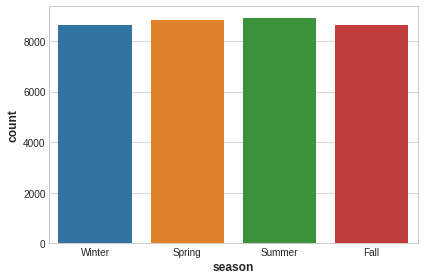

In [77]:
g = sns.countplot(data['season'])
g.set_xticklabels(['Winter','Spring', 'Summer', 'Fall'])
plt.show()

In [78]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = StandardScaler().fit_transform(X)
X = normalize(X, norm="max")

In [79]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.7)
input_shape = [X_train.shape[1]]

In [30]:
from tensorflow import keras
from keras.layers import Layer, Dense, Flatten
from keras import backend as K
from keras import layers
from keras.models import Sequential
from keras.losses import binary_crossentropy


class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)
model = Sequential()
model.add(Flatten(input_shape=(36,)))

model.add(RBFLayer(80, 0.1))
model.add(RBFLayer(5, 0.05))
model.add(RBFLayer(2, 0.05))
model.add(Dense(1, activation='sigmoid', name='foo'))

In [31]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [32]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True,
)

In [33]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5482 - binary_accuracy: 0.8021 - val_loss: 0.5389 - val_binary_accuracy: 0.8021
Epoch 2/200
48/48 [==============================] - 0s 8ms/step - loss: 0.5302 - binary_accuracy: 0.8021 - val_loss: 0.5221 - val_binary_accuracy: 0.8021
Epoch 3/200
48/48 [==============================] - 0s 8ms/step - loss: 0.5148 - binary_accuracy: 0.8021 - val_loss: 0.5081 - val_binary_accuracy: 0.8021
Epoch 4/200
48/48 [==============================] - 0s 8ms/step - loss: 0.5035 - binary_accuracy: 0.8021 - val_loss: 0.4996 - val_binary_accuracy: 0.8021
Epoch 5/200
48/48 [==============================] - 0s 8ms/step - loss: 0.4971 - binary_accuracy: 0.8021 - val_loss: 0.4952 - val_binary_accuracy: 0.8021
Epoch 6/200
48/48 [==============================] - 0s 8ms/step - loss: 0.4942 - binary_accuracy: 0.8021 - val_loss: 0.4933 - val_binary_accuracy: 0.8021
Epoch 7/200
48/48 [==============================] - 0s 8ms/step - lo

329/329 [==============================] - 0s 1ms/step


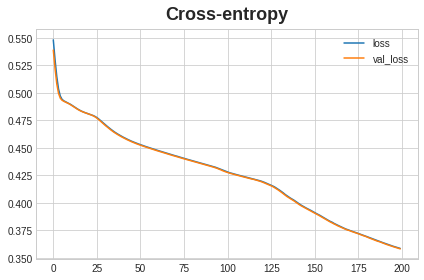

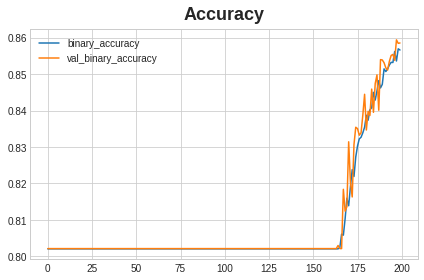

In [34]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
y_pred = model.predict(X_valid).round()

In [35]:
#pip install tensorflow-addons

In [82]:
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)

     
def classifier(k):
  from sklearn.neighbors import KNeighborsClassifier
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
  y_pred = classifier.fit(X_train, y_train).predict(X_valid)
  return y_pred

# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train)
     

#from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', random_state = 0)


#from sklearn.cluster import DBSCAN
#Numpy array of all the cluster labels assigned to each data point
#label = DBSCAN(eps = 0.001, min_samples = 10, algorithm='ball_tree', metric='haversine').fit_predict(X_principal)
#label = db_default.labels_
#labels.to_csv('test_DBSCAN1.csv')
     

#from sklearn.ensemble import IsolationForest
#label = IsolationForest(n_estimators= 500, contamination=3/60).fit_predict(X_principal)
     

#from sklearn.cluster import OPTICS
#label = OPTICS(min_samples= 500).fit_predict(X_principal)
     

#from sklearn.neighbors import LocalOutlierFactor
#lof = LocalOutlierFactor(n_neighbors=500)
#label = lof.fit_predict(X_principal)
     

#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2, algorithm='elkan', init='k-means++')
#label = kmeans.fit_predict(X_principal)

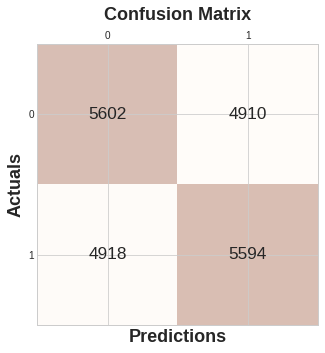

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [74]:
print(f"f1_score is:{f1_score(y_valid, y_pred, average='binary')}\n accuracy_score is: {accuracy_score(y_valid, y_pred)}\n precision is: {precision_score(y_valid, y_pred)}\n recal is: {recall_score(y_valid, y_pred)}") 

f1_score is:0.5323562999619337
 accuracy_score is: 0.5325342465753424
 precision is: 0.5325590251332826
 recal is: 0.5321537290715372


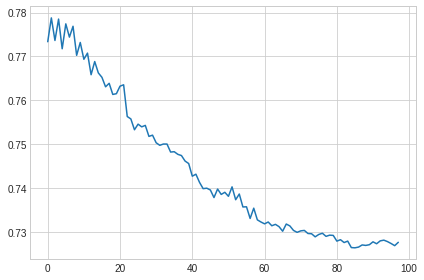

In [83]:
f1_list = []
for k in range(2, 100):
  y_pred = classifier(k)
  f1 = f1_score(y_valid, y_pred, average='binary')
  f1_list.append(f1)
plt.plot(f1_list)